In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult 3.csv to adult 3.csv


In [3]:
import pandas as pd

df = pd.read_csv('adult 3.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



Model: Logistic Regression
Accuracy: 0.8211166390270868
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      6842
           1       0.71      0.45      0.55      2203

    accuracy                           0.82      9045
   macro avg       0.78      0.69      0.72      9045
weighted avg       0.81      0.82      0.81      9045



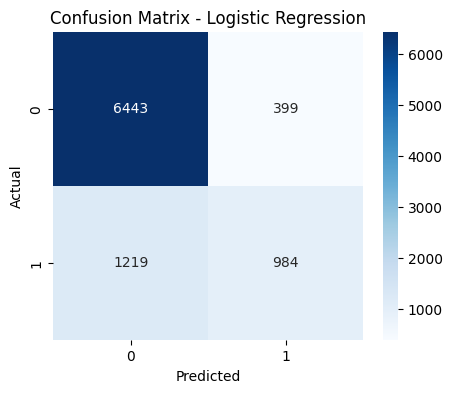


Model: Random Forest
Accuracy: 0.8590381426202321
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      6842
           1       0.75      0.63      0.68      2203

    accuracy                           0.86      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.86      0.85      9045



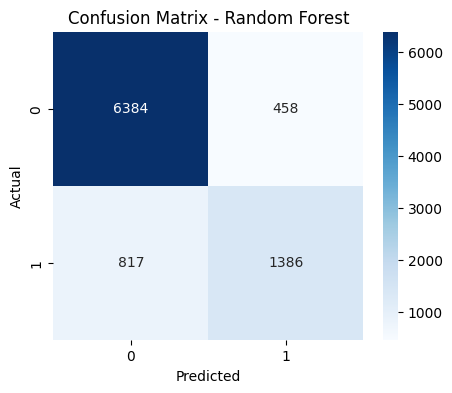

In [4]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 2: Load Dataset
df = pd.read_csv('adult 3.csv')  # Make sure to upload the file

# Step 3: Data Cleaning
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Step 4: Encode Categorical Columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Step 5: Feature Selection
X = df.drop("income", axis=1)
y = df["income"]

# Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Scale Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 8: Train Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Step 9: Train Random Forest Model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Step 10: Evaluate Models
models = {'Logistic Regression': (lr_model, lr_preds), 'Random Forest': (rf_model, rf_preds)}

for name, (model, preds) in models.items():
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Classification Report:\n", classification_report(y_test, preds))

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
